**Example 3: (ODE)**

$$y'(x)+ \left(x+\frac{1+3x^2}{1+x+x^3}\right)y(x)=x^3+2x+x^2 \frac{1+3x^2}{1+x+x^3} \\
,\quad x \in [0,1], \quad y(0)=1$$

The exact solution is $\dfrac{e^{-x^2/2}}{1+x+x^3}+x^2.$

In [1]:
import autograd.numpy as np
from autograd import grad 
import autograd.numpy.random as npr

from autograd.core import primitive

from matplotlib import pyplot as plt

In [29]:
nx = 10 # number of time interval
dx = 1. / nx # distance between two mesh points

In [30]:
def A(x): #LHS
    return x + (1. + 3.*x**2) / (1. + x + x**3)

def B(x): #RHS    
    return x**3 + 2.*x + x**2 * ((1. + 3.*x**2) / (1. + x + x**3))

def f(x, y):     #  y'(x)= f(x, y) is defined by the original equation.       
    return B(x) - y * A(x)

def y_analytic(x): #Analytical solution of current problem  
    return (np.exp((-x**2)/2.)) / (1. + x + x**3) + x**2

In [31]:
x_space = np.linspace(0, 1, nx)  # mesh grid  
y_space = y_analytic(x_space)
y_fd = np.zeros_like(y_space) #fd means finite difference
y_fd[0] = 1. # Initial condition
# Euler's method for compute the numerical solution
#y(i+1)=y(i)+h*y'(i)
for i in range(1, len(x_space)):
    y_fd[i] = y_fd[i-1] + B(x_space[i]) * dx - y_fd[i-1] * A(x_space[i]) * dx

In [32]:
def sigmoid(x): #Define sigmoid function
    return 1 / (1 + np.exp(-x))


def sigmoid_grad(x): #Define the derivative of sigmoid function
    return sigmoid(x) * (1 - sigmoid(x))

## We build the neural network without the bias for simplicity.

def neural_network(W, x): 
    a1 = sigmoid(np.dot(x, W[0]))
    return np.dot(a1, W[1])


def d_neural_network_dx(W, x, k=1): # k: the order of derivative
    #return np.dot(np.dot(W[1].T, W[0].T**k), sigmoid_grad(x))
    return np.dot(np.multiply(W[0],sigmoid_grad(np.dot(x, W[0]))),W[1])


def loss_function(W, x):
    loss_sum = 0.
    for xi in x:
        net_out = neural_network(W, xi)[0][0] # output for y(xi)
        y_t = 1. + xi * net_out # trial solution (1- initial condition)
        d_net_out = d_neural_network_dx(W, xi)[0][0] # output for y'(xi)
        d_y_t = net_out + xi * d_net_out # derivative of trial solution
        func = f(xi, y_t)       
        err_sqr = (d_y_t - func)**2 # loss function is computed by squared error

        loss_sum += err_sqr
    return loss_sum

***Remark:*** The trial solution is defined by $y(x_i)=y(0)+x_iN(x_i)$ where $N(x_i)$ is the output of a feedforward neural network with one input unit for $x$.

The error quantity to be minimized is given by: $$L=(y'(x_i)-f(x_i,y(x_i)))^2$$
where $y'(x_i)=N(x_i)+x_iN'(x_i)$, it is straightforward
to compute the gradient of the error with respect to the weights by the chain rule.

In this example $N(x_i)=\sum_{j=1}^{10} \sigma(x_iW[0][j])W[1][j]$
then $N'(x_i)=\sum_{j=1}^{10} W[0][j]\sigma'(x_iW[0][j])W[1][j]$


In [33]:
W = [npr.randn(1, 10), npr.randn(10, 1)] # Initialise weights
lmb = 0.001 #learning rate

# Gradient decent optimaztion step

for i in range(1000):
    loss_grad =  grad(loss_function)(W, x_space) # grad fynction to compute gradient of any function.
 # Gradient updates   
    W[0] = W[0] - lmb * loss_grad[0]
    W[1] = W[1] - lmb * loss_grad[1]
    if (i%100==0):
        print(loss_function(W,x_space))


45.922987668880126
0.6708243009283369
0.34144664538349867
0.2079267056808002
0.154452582487332
0.13285077347276741
0.12373239110067559
0.1194607744690459
0.11706897155697857
0.115413894847605


0.11406996366519234


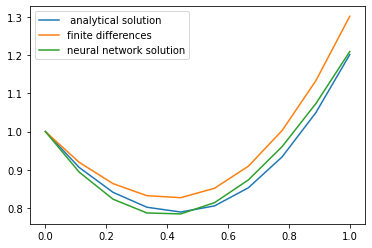

In [34]:
print(loss_function(W, x_space))
res = [1 + xi * neural_network(W, xi)[0][0] for xi in x_space] 
#print(W)
plt.figure()
plt.plot(x_space, y_space,label=' analytical solution ') 
plt.plot(x_space, y_fd, label ='finite differences ')
plt.plot(x_space, res,label='neural network solution')
plt.legend()
plt.show()

***Example 4: (ODEs)***


